In [9]:

#Smart Agriculture LSTM 
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Load and prepare data
df = pd.read_csv('completeData.csv')
df=df.drop('Unnamed: 7', axis=1)
df=df.drop('Unnamed: 8', axis=1)

df

,N,P,K,temperature,humidity,ph,Labelling
0,90,42.0,43,20.879744,82.002744,6.502985,0.0
1,85,58.0,40,20.770461,80.309644,7.038096,0.0
2,60,55.0,44,23.004459,82.320763,7.840207,0.0
3,74,35.0,40,26.490096,80.058363,6.980401,0.0
4,78,42.0,42,20.030075,80.604873,7.628473,0.0
...,...,...,...,...,...,...,...
12545,219,100.0,235,24.000000,88.000000,7.271978,1.0
12546,212,128.0,230,24.000000,86.000000,7.419632,1.0
12547,236,146.0,222,24.000000,87.000000,7.425135,1.0
12548,248,119.0,222,24.000000,88.000000,7.422796,1.0


In [3]:
# prompt: count each label in dataset

df['Labelling'].value_counts()


Labelling
0.0    7249
1.0    5300
Name: count, dtype: int64

In [ ]:
y_train.value_counts()


In [ ]:
y_test.value_counts()


In [7]:
# prompt: drop row having any nan

df = df.dropna()


In [8]:

# Create additional features
df["temp_humidity_ratio"] = df["temperature"] / df["humidity"]

X = df[["N", "P", "K", "temperature", "humidity", "temp_humidity_ratio"]]
y = df["Labelling"]

/var/folders/v4/9f0xprhx79j2bpk30s_k945w0000gn/T/ipykernel_47661/1619112254.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["temp_humidity_ratio"] = df["temperature"] / df["humidity"]


In [9]:
y.isna().sum()

0

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y )

# # Reshape data for LSTM
X_train = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))



In [11]:
print(len(X_train))
print(len(y_train))
print(len(y_test))
print(len(X_test))

10039
10039
2510
2510


In [ ]:
# !pip install transformers # did not work for pipeline
from sklearn.pipeline import Pipeline
import sklearn
pipeline = Pipeline([
    ('std_scalar', sklearn.preprocessing.StandardScaler())
])

# X_train = pipeline.fit_transform(X_train)
# X_test = pipeline.transform(X_test)

In [10]:
# Build LSTM model
model = Sequential()
model.add(LSTM(64, activation='relu', return_sequences=True,
               input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(64, activation='relu', return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
lstm=model

# Train model
# model.fit(X_train, y_train, epochs=10, batch_size=32,
        #  validation_data=(X_test, y_test))

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 6, 64)             16896     
                                                                 
 dropout_3 (Dropout)         (None, 6, 64)             0         
                                                                 
 lstm_4 (LSTM)               (None, 6, 64)             33024     
                                                                 
 dropout_4 (Dropout)         (None, 6, 64)             0         
                                                                 
 lstm_5 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

# Load data
df = pd.read_csv('completeData.csv')
df=df.drop('Unnamed: 7', axis=1)
df=df.drop('Unnamed: 8', axis=1)
# Split features and target
X = df.loc[:, ['N', 'P', 'K', 'temperature', 'humidity', 'ph']]
y = df['Labelling']

# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape feature data for CNN input
X_train = X_train.values.reshape(-1,1,6,1)
X_test = X_test.values.reshape(-1,1,6,1)

# One hot encode target
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

# Build CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(1,3), activation='relu', input_shape=(1,6,1)))
model.add(MaxPooling2D(pool_size=(1, 2)))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
cnn=model


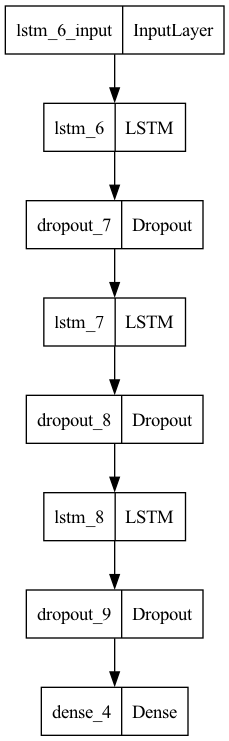

In [34]:
import tensorflow as tf
# !pip install pydot
# !brew install graphviz
tf.keras.utils.plot_model(model, "model.png", show_shapes=False, show_dtype=False, show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96)

In [ ]:
# !pip install visualkeras
import visualkeras

# visualkeras.layered_view(cnn).show() # display using your system viewer
# visualkeras.layered_view(cnn, to_file='output.png') # write to disk
# visualkeras.layered_view(cnn, to_file='output.png').show() # write and show

# visualkeras.layered_view(cnn)
# visualkeras.layered_view(lstm)